In [1]:
# What GPU are we using?
!nvidia-smi

Mon Jul 10 23:20:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.mobilenet import MobileNet
from keras import metrics

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# from tensorflow.keras.mixed_precision import experimental as mixed_precision
from tensorflow.python.keras.mixed_precision.policy import set_global_policy
set_global_policy('mixed_float16')
# set_global_policy(policy)
# print('Compute dtype: %s' % policy.compute_dtype)
# print('Variable dtype: %s' % policy.variable_dtype)

In [5]:
train_dir = "/content/gdrive/MyDrive/Machine Learning/Monkeypox/dataset/train"
test_dir = "/content/gdrive/MyDrive/Machine Learning/Monkeypox/dataset/test"

In [6]:
model1 = MobileNet(include_top=False,input_shape=(224, 224, 3), weights='imagenet')

17225924/17225924 [==============================] - 0s 0us/step


In [7]:
input_shape = (224,224)

In [8]:
datagen_train = ImageDataGenerator(rescale=1./255,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip=False,
                                  vertical_flip=True)


datagen_test = ImageDataGenerator(rescale=1./255)


batch_size = 32
generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True)

generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)


Found 2310 images belonging to 3 classes.
Found 770 images belonging to 3 classes.


In [9]:
def print_layer_trainable():
    for layer in model1.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))


print_layer_trainable()

True:	input_1
True:	conv1
True:	conv1_bn
True:	conv1_relu
True:	conv_dw_1
True:	conv_dw_1_bn
True:	conv_dw_1_relu
True:	conv_pw_1
True:	conv_pw_1_bn
True:	conv_pw_1_relu
True:	conv_pad_2
True:	conv_dw_2
True:	conv_dw_2_bn
True:	conv_dw_2_relu
True:	conv_pw_2
True:	conv_pw_2_bn
True:	conv_pw_2_relu
True:	conv_dw_3
True:	conv_dw_3_bn
True:	conv_dw_3_relu
True:	conv_pw_3
True:	conv_pw_3_bn
True:	conv_pw_3_relu
True:	conv_pad_4
True:	conv_dw_4
True:	conv_dw_4_bn
True:	conv_dw_4_relu
True:	conv_pw_4
True:	conv_pw_4_bn
True:	conv_pw_4_relu
True:	conv_dw_5
True:	conv_dw_5_bn
True:	conv_dw_5_relu
True:	conv_pw_5
True:	conv_pw_5_bn
True:	conv_pw_5_relu
True:	conv_pad_6
True:	conv_dw_6
True:	conv_dw_6_bn
True:	conv_dw_6_relu
True:	conv_pw_6
True:	conv_pw_6_bn
True:	conv_pw_6_relu
True:	conv_dw_7
True:	conv_dw_7_bn
True:	conv_dw_7_relu
True:	conv_pw_7
True:	conv_pw_7_bn
True:	conv_pw_7_relu
True:	conv_dw_8
True:	conv_dw_8_bn
True:	conv_dw_8_relu
True:	conv_pw_8
True:	conv_pw_8_bn
True:	conv_pw_8_

In [10]:
transfer_layer = model1.get_layer('conv_pw_13_relu')
conv_model = Model(inputs=model1.input, outputs=transfer_layer.output)

In [11]:
def print_layer_trainable():
    for layer in conv_model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))


print_layer_trainable()

True:	input_1
True:	conv1
True:	conv1_bn
True:	conv1_relu
True:	conv_dw_1
True:	conv_dw_1_bn
True:	conv_dw_1_relu
True:	conv_pw_1
True:	conv_pw_1_bn
True:	conv_pw_1_relu
True:	conv_pad_2
True:	conv_dw_2
True:	conv_dw_2_bn
True:	conv_dw_2_relu
True:	conv_pw_2
True:	conv_pw_2_bn
True:	conv_pw_2_relu
True:	conv_dw_3
True:	conv_dw_3_bn
True:	conv_dw_3_relu
True:	conv_pw_3
True:	conv_pw_3_bn
True:	conv_pw_3_relu
True:	conv_pad_4
True:	conv_dw_4
True:	conv_dw_4_bn
True:	conv_dw_4_relu
True:	conv_pw_4
True:	conv_pw_4_bn
True:	conv_pw_4_relu
True:	conv_dw_5
True:	conv_dw_5_bn
True:	conv_dw_5_relu
True:	conv_pw_5
True:	conv_pw_5_bn
True:	conv_pw_5_relu
True:	conv_pad_6
True:	conv_dw_6
True:	conv_dw_6_bn
True:	conv_dw_6_relu
True:	conv_pw_6
True:	conv_pw_6_bn
True:	conv_pw_6_relu
True:	conv_dw_7
True:	conv_dw_7_bn
True:	conv_dw_7_relu
True:	conv_pw_7
True:	conv_pw_7_bn
True:	conv_pw_7_relu
True:	conv_dw_8
True:	conv_dw_8_bn
True:	conv_dw_8_relu
True:	conv_pw_8
True:	conv_pw_8_bn
True:	conv_pw_8_

In [12]:
#for layer in conv_model.layers:
#    layer.trainable = False

# Start a new Keras Sequential model.
new_model = Sequential()

# Add the convolutional part of the VGG16 model from above.
new_model.add(conv_model)

# Flatten the output of the VGG16 model because it is from a
# convolutional layer.
new_model.add(Flatten())

# Add a dense (aka. fully-connected) layer.
# This is for combining features that the VGG16 model has
# recognized in the image.

new_model.add(Dense(1024, activation='relu'))
# new_model.add(Dropout(0.5))
new_model.add(Dense(512, activation='relu'))
# Add a dropout-layer which may prevent overfitting and
# improve generalization ability to unseen data e.g. the test-set.
#new_model.add(Dense(512, activation='relu'))


# Add the final layer for the actual classification.
new_model.add(Dense(3, activation='softmax'))

In [13]:
optimizer = Adam()
loss = 'categorical_crossentropy'
metrics = ["categorical_accuracy"]


new_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [14]:
epochs = 80

steps_per_epoch = generator_train.n / batch_size
steps_test = generator_test.n / batch_size
print(steps_per_epoch)
print(steps_test)

#steps_per_epoch = 20
#steps_test = 100
history = new_model.fit_generator(generator=generator_train,
                                  epochs=epochs,
                                  steps_per_epoch=steps_per_epoch,
                                  validation_data=generator_test,
                                  validation_steps=steps_test)

72.1875
24.0625


<ipython-input-14-05800b0da5fc>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = new_model.fit_generator(generator=generator_train,


Epoch 1/80
72/72 [==============================] - 776s 10s/step - loss: 5.5317 - categorical_accuracy: 0.7364 - val_loss: 5.0190 - val_categorical_accuracy: 0.6545
Epoch 2/80
72/72 [==============================] - 35s 491ms/step - loss: 0.3572 - categorical_accuracy: 0.8857 - val_loss: 4.8387 - val_categorical_accuracy: 0.5532
Epoch 3/80
72/72 [==============================] - 34s 475ms/step - loss: 0.2557 - categorical_accuracy: 0.9091 - val_loss: 4.3271 - val_categorical_accuracy: 0.7286
Epoch 4/80
72/72 [==============================] - 37s 516ms/step - loss: 0.3618 - categorical_accuracy: 0.8879 - val_loss: 12.4881 - val_categorical_accuracy: 0.3623
Epoch 5/80
72/72 [==============================] - 34s 478ms/step - loss: 0.3032 - categorical_accuracy: 0.9195 - val_loss: 12.1736 - val_categorical_accuracy: 0.3675
Epoch 6/80
72/72 [==============================] - 36s 494ms/step - loss: 0.2459 - categorical_accuracy: 0.9195 - val_loss: 1.4973 - val_categorical_accuracy: 0.68

In [15]:
new_model.save('D:/School/Sadia/Final V2/MobileNet.h5')

In [16]:
y_pred = new_model.predict_generator(generator_test,steps = steps_test)

<ipython-input-16-2b080bcd130e>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = new_model.predict_generator(generator_test,steps = steps_test)


In [17]:
predicted_class_indices=np.argmax(y_pred,axis=1)
print(predicted_class_indices)

[2 0 0 2 0 0 2 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 2 0 2
 2 2 0 2 0 0 2 0 0 0 2 0 0 2 0 0 2 2 0 2 2 0 1 0 2 0 0 2 0 0 0 2 0 2 0 0 2
 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2
 0 1 0 2 2 0 0 0 0 0 0 0 1 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 0 1 2
 1 1 1 1 1 1 0 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 0 1 0 1
 2 1 1 1 1 0 2 2 2 1 0 1 0 2 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 2 1 1 2 1 2 1 0 1 1 0 1 1 1 2 1 1 1 2 2 1 1 1 0 1 0 2 0 1 1
 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 0 2 1 1 2 1 2 1 1 2 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [18]:
true_labels = generator_test.classes

In [19]:
y_pred.shape

(770, 3)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_class_indices))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       198
           1       0.99      0.79      0.88       279
           2       0.78      1.00      0.88       293

    accuracy                           0.86       770
   macro avg       0.88      0.85      0.86       770
weighted avg       0.88      0.86      0.86       770



In [21]:
generator_test.class_indices

{'chickenpox+measles': 0, 'monkeypox': 1, 'normal': 2}

In [22]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(true_labels, predicted_class_indices)

<Axes: >

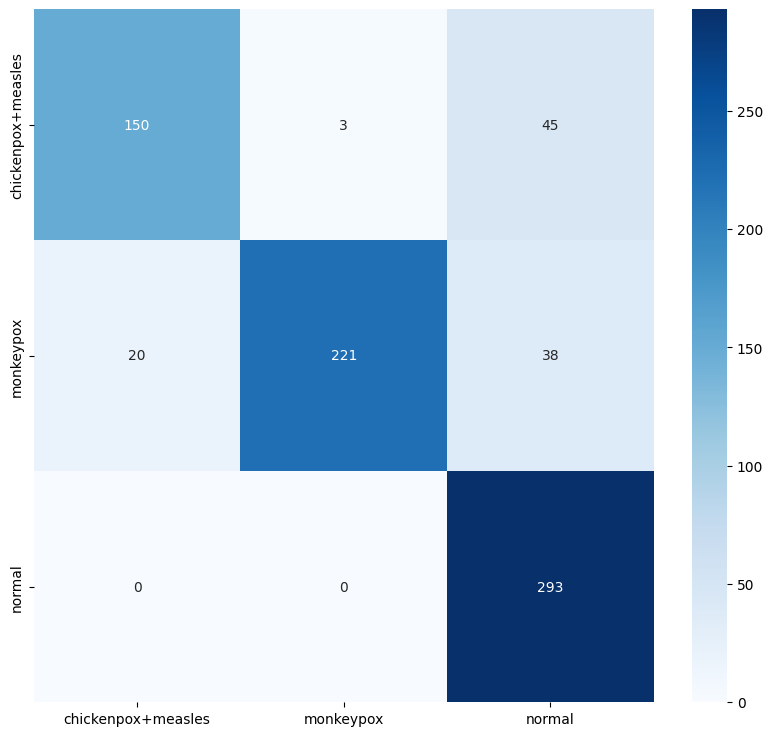

In [23]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(array, index = ["chickenpox+measles", "monkeypox", "normal"],
                  columns = ["chickenpox+measles", "monkeypox", "normal"])
plt.figure(figsize = (10,9))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

{'loss': [5.531684875488281, 0.35715171694755554, 0.25568005442619324, 0.3617885708808899, 0.3031670153141022, 0.24594168365001678, 0.18753935396671295, 0.13475465774536133, 0.1828552633523941, 0.2585052251815796, 0.18269574642181396, 0.16833047568798065, 0.24880944192409515, 0.17969104647636414, 0.20099692046642303, 0.1230224221944809, 0.10161460191011429, 0.10419239848852158, 0.08900713920593262, 0.15758822858333588, 0.07698221504688263, 0.22666501998901367, 0.11123248934745789, 0.05655938386917114, 0.08076278865337372, 0.07809681445360184, 0.07212885469198227, 0.0922996923327446, 0.0720713883638382, 0.027629541233181953, 0.25115421414375305, 0.11244694143533707, 0.07418414205312729, 0.07810939103364944, 0.06208636239171028, 0.07821199297904968, 0.08509206771850586, 0.08330181986093521, 0.043633852154016495, 0.06580595672130585, 0.06389170140028, 0.04729534313082695, 0.04365319758653641, 0.046689871698617935, 0.0434706024825573, 0.0670812800526619, 0.0634584054350853, 0.0373562797904

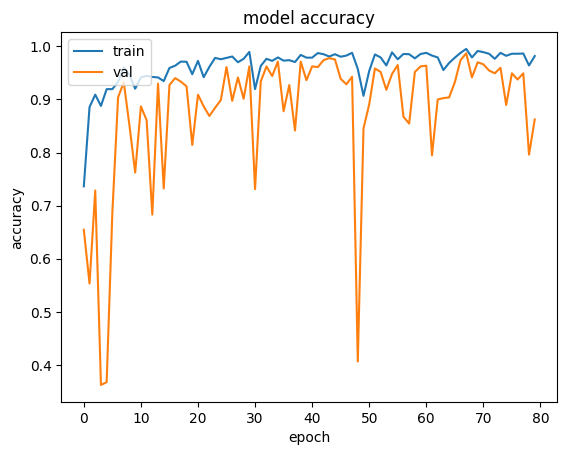

In [24]:
import matplotlib.pyplot as plt
print(history.history)
print(history.history['categorical_accuracy'])
print(history.history['val_categorical_accuracy'])
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
# plt.plot([0.9730,0.9416,0.9319,0.9611,0.9632,0.9739,0.9769,0.9781,0.9798,0.9816])
# plt.plot([0.9250,0.9610,0.9730,0.9760,0.9690,0.9670,0.9620,0.9680,0.9650,0.9620])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

[5.531684875488281, 0.35715171694755554, 0.25568005442619324, 0.3617885708808899, 0.3031670153141022, 0.24594168365001678, 0.18753935396671295, 0.13475465774536133, 0.1828552633523941, 0.2585052251815796, 0.18269574642181396, 0.16833047568798065, 0.24880944192409515, 0.17969104647636414, 0.20099692046642303, 0.1230224221944809, 0.10161460191011429, 0.10419239848852158, 0.08900713920593262, 0.15758822858333588, 0.07698221504688263, 0.22666501998901367, 0.11123248934745789, 0.05655938386917114, 0.08076278865337372, 0.07809681445360184, 0.07212885469198227, 0.0922996923327446, 0.0720713883638382, 0.027629541233181953, 0.25115421414375305, 0.11244694143533707, 0.07418414205312729, 0.07810939103364944, 0.06208636239171028, 0.07821199297904968, 0.08509206771850586, 0.08330181986093521, 0.043633852154016495, 0.06580595672130585, 0.06389170140028, 0.04729534313082695, 0.04365319758653641, 0.046689871698617935, 0.0434706024825573, 0.0670812800526619, 0.0634584054350853, 0.03735627979040146, 0.2

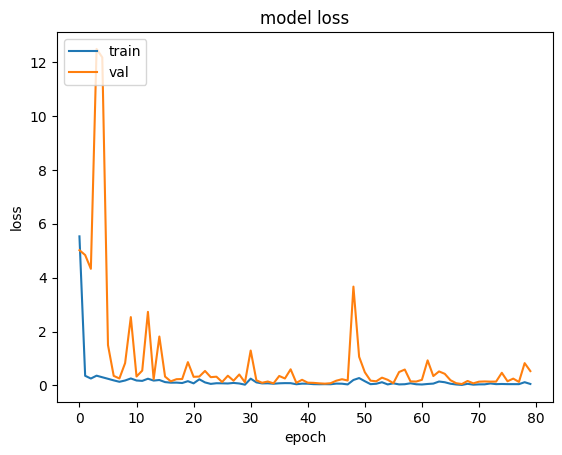

In [25]:
print(history.history['loss'])
print(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.plot([0.3015,0.1494,0.1164,0.0994,0.0858,0.0766,0.0689,0.0649,0.0588,0.0526])
# plt.plot([0.2164,0.1063,0.0831,0.0733,0.0940,0.1094,0.1479,0.1522,0.1211,0.1249])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [28]:
monke = tf.io.read_file("/content/gdrive/MyDrive/Machine Learning/Monkeypox/dataset/test/monkeypox/3.jpg")
# Turn file into a tensor
monke = tf.image.decode_image(monke)

# Resize image
monke = tf.image.resize(monke, size=[256, 256])

# Normalize data
monke = monke / 255
prediction = new_model.predict(tf.expand_dims(monke, axis=0))
prediction

ValueError: ignored